In [ ]:
import numpy as np
import pandas as pd

import random

import pickle
from os import path

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Dropout, Activation

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
import glob

path = r'/content/drive/MyDrive/CIC-DDoS 2019/03-11'
all_files = glob.glob(path + "/*.csv")

li = []

p = 0.20  # 20% of the lines

#First Day Data
for filename in all_files:
    #df = pd.read_csv(filename, low_memory=False)
    if filename == "/content/drive/MyDrive/CIC-DDoS 2019/01-12/TFTP.csv":
        df = pd.read_csv(filename, skiprows=lambda i: i>0 and random.random() > 0.10, low_memory=False) #there may be problem in the next line
    elif filename == "/content/drive/MyDrive/CIC-DDoS 2019/03-11/Portmap.csv" or filename == "/content/drive/MyDrive/CIC-DDoS 2019/01-12/UDPLag.csv" or filename == "/content/drive/MyDrive/CIC-DDoS 2019/01-12/UDPLag.csv":
        df = pd.read_csv(filename, low_memory=False)
    else:
        df = pd.read_csv(filename, skiprows=lambda i: i>0 and random.random() > p, low_memory=False)
    li.append(df)
    print("Read Completed for ", filename)

#Second Day Data
path = r'/content/drive/MyDrive/CIC-DDoS 2019/01-12'
all_files = glob.glob(path + "/*.csv")

for filename in all_files:
    df = pd.read_csv(filename, low_memory=False)
    li.append(df)
    print("Read Completed for ", filename)



df = pd.concat(li, axis=0, ignore_index=True)

print("Finished Reading all data...")

In [ ]:
print(df.shape)

(54136661, 88)


In [ ]:
df=df.drop('Unnamed: 0',axis=1)

overfitting_columns = [' Source IP', ' Destination IP', ' Source Port', ' Destination Port', ' Timestamp', 'SimillarHTTP', 'Flow ID', ' Fwd URG Flags', ' Bwd URG Flags', 'FIN Flag Count', ' PSH Flag Count', ' ECE Flag Count', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
df.drop(labels=overfitting_columns, axis='columns', inplace=True)

print("columns: ", len(df.columns))
df.columns

columns:  69


Index([' Protocol', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       ' SYN Flag Count', ' RST Flag Count', ' ACK F

In [ ]:
df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,17,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS
1,17,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS
2,17,48,2,0,458.0,0.0,229.0,229.0,229.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS
3,17,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS
4,17,49,2,0,458.0,0.0,229.0,229.0,229.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NetBIOS


In [ ]:
df = df.rename(columns={' Label': 'Label'})
df["Label"].value_counts()

TFTP             20082580
DrDoS_SNMP        5159870
DrDoS_DNS         5071011
DrDoS_MSSQL       4522492
DrDoS_NetBIOS     4093279
DrDoS_UDP         3134645
DrDoS_SSDP        2610611
Syn               2559489
DrDoS_LDAP        2179930
DrDoS_NTP         1202642
MSSQL             1158653
UDP                774686
NetBIOS            731342
LDAP               382827
UDP-lag            366461
BENIGN              68181
Portmap             37170
WebDDoS               439
UDPLag                353
Name: Label, dtype: int64

In [ ]:
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))

def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

In [ ]:
analyze(df)


54136661 rows
**  Protocol:[17:94.3%,6:5.7%,0:0.01%]
**  Flow Duration:1147356 (2%)
**  Total Fwd Packets:734 (0%)
**  Total Backward Packets:349 (0%)
** Total Length of Fwd Packets:5514 (0%)
**  Total Length of Bwd Packets:3888 (0%)
**  Fwd Packet Length Max:2312 (0%)
**  Fwd Packet Length Min:1479 (0%)
**  Fwd Packet Length Mean:9514 (0%)
**  Fwd Packet Length Std:9743 (0%)
** Bwd Packet Length Max:896 (0%)
**  Bwd Packet Length Min:210 (0%)
**  Bwd Packet Length Mean:5653 (0%)
**  Bwd Packet Length Std:5787 (0%)
** Flow Bytes/s:1535201 (2%)
**  Flow Packets/s:1442423 (2%)
**  Flow IAT Mean:1705483 (3%)
**  Flow IAT Std:5504290 (10%)
**  Flow IAT Max:771229 (1%)
**  Flow IAT Min:2989 (0%)
** Fwd IAT Total:1140301 (2%)
**  Fwd IAT Mean:1691212 (3%)
**  Fwd IAT Std:5485062 (10%)
**  Fwd IAT Max:761540 (1%)
**  Fwd IAT Min:876 (0%)
** Bwd IAT Total:99779 (0%)
**  Bwd IAT Mean:100344 (0%)
**  Bwd IAT Std:100986 (0%)
**  Bwd IAT Max:98080 (0%)
**  Bwd IAT Min:143 (0%)
** Fwd PSH Flags:[0

In [ ]:
from matplotlib.pyplot import *

plt.figure(figsize=(20,20))

fig, ax = plt.subplots(figsize=(20,20))

class_distribution = df['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of CICDDoS2019 Training Data')
plt.grid()
plt.show()

In [ ]:

sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i],
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class TFTP : 20082580 ( 37.096 %)
Number of data points in class DrDoS_SNMP : 5159870 ( 9.531 %)
Number of data points in class DrDoS_DNS : 5071011 ( 9.367 %)
Number of data points in class DrDoS_MSSQL : 4522492 ( 8.354 %)
Number of data points in class DrDoS_NetBIOS : 4093279 ( 7.561 %)
Number of data points in class DrDoS_UDP : 3134645 ( 5.79 %)
Number of data points in class DrDoS_SSDP : 2610611 ( 4.822 %)
Number of data points in class Syn : 2559489 ( 4.728 %)
Number of data points in class DrDoS_LDAP : 2179930 ( 4.027 %)
Number of data points in class DrDoS_NTP : 1202642 ( 2.221 %)
Number of data points in class MSSQL : 1158653 ( 2.14 %)
Number of data points in class UDP : 774686 ( 1.431 %)
Number of data points in class NetBIOS : 731342 ( 1.351 %)
Number of data points in class LDAP : 382827 ( 0.707 %)
Number of data points in class UDP-lag : 366461 ( 0.677 %)
Number of data points in class BENIGN : 68181 ( 0.126 %)
Number of data points in class Portmap

In [ ]:
# Data Cleaning
print('Null values in dataset are',len(df[df.isnull().any(1)]))
print('='*40)

df.drop_duplicates(keep='first', inplace = True)

df.dropna(inplace=True,axis=1)

print("Read {} rows.".format(len(df)))

Null values in dataset are 249050
Read 8830357 rows.


In [ ]:
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of Cleaned CICDDoS2019 Training Data')
plt.grid()
plt.show()

In [ ]:
# After Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i],
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class TFTP : 4396777 ( 49.792 %)
Number of data points in class DrDoS_NTP : 1112904 ( 12.603 %)
Number of data points in class DrDoS_UDP : 1075330 ( 12.178 %)
Number of data points in class DrDoS_SSDP : 891221 ( 10.093 %)
Number of data points in class UDP : 323173 ( 3.66 %)
Number of data points in class Syn : 277546 ( 3.143 %)
Number of data points in class DrDoS_MSSQL : 207003 ( 2.344 %)
Number of data points in class DrDoS_SNMP : 114185 ( 1.293 %)
Number of data points in class DrDoS_DNS : 113259 ( 1.283 %)
Number of data points in class MSSQL : 107835 ( 1.221 %)
Number of data points in class UDP-lag : 89056 ( 1.009 %)
Number of data points in class BENIGN : 60701 ( 0.687 %)
Number of data points in class DrDoS_LDAP : 30099 ( 0.341 %)
Number of data points in class DrDoS_NetBIOS : 19490 ( 0.221 %)
Number of data points in class LDAP : 7041 ( 0.08 %)
Number of data points in class NetBIOS : 3528 ( 0.04 %)
Number of data points in class Portmap : 644 ( 0.007

In [ ]:
data = df.iloc[:,1:-1]

In [ ]:
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

In [ ]:
corr = data.corr()

In [ ]:
print(df.columns)

Index([' Protocol', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Flow Packets/s', ' Flow IAT Mean',
       ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total',
       ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min',
       'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max',
       ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', ' SYN Flag Count',
       ' RST Flag Count', ' ACK Flag Count', ' UR

In [ ]:
#drop na values and reset index
data_clean = df.dropna().reset_index()

# label encoding
labelencoder = LabelEncoder()
data_clean['Label'] = labelencoder.fit_transform(data_clean['Label'])

data_clean['Label'].value_counts()

14    4396777
4     1112904
8     1075330
7      891221
15     323173
13     277546
3      207003
6      114185
1      113259
10     107835
16      89056
0       60701
2       30099
5       19490
9        7041
11       3528
12        644
18        414
17        151
Name: Label, dtype: int64

In [ ]:
data_np = data_clean.to_numpy(dtype="float32")
data_np = data_np[~np.isinf(data_np).any(axis=1)]

del df

X = data_np[:, 0:67]

enc = OneHotEncoder()

Y = enc.fit_transform(data_np[:,68:]).toarray()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2, shuffle=True)


_features = X.shape[1]
n_classes = Y.shape[1]

print('X.shape = ',X.shape)
print('Y.shape = ',Y.shape)
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', Y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',Y_test.shape)

X.shape =  (8797944, 67)
Y.shape =  (8797944, 19)
X_train.shape =  (6598458, 67)
y_train.shape =  (6598458, 19)
X_test.shape =  (2199486, 67)
y_test.shape =  (2199486, 19)


In [ ]:
del data_np
del data_clean

In [ ]:
from keras.layers import Dense, Dropout, Activation, Embedding, Flatten
from keras.layers import LSTM, GRU, Bidirectional, BatchNormalization, Convolution1D, MaxPooling1D, Reshape

model = Sequential()
model.add(LSTM(64,return_sequences=True,input_shape = (1, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Flatten())
model.add(Dense(units=50))
model.add(Dense(units=5,activation='softmax'))

model.summary()
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [ ]:
early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.0001)

history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=30,
                              verbose=True,
                              validation_data=(X_test, Y_test))

Epoch 1/30
51551/51551 [==============================] - 1714s 33ms/step - loss: 0.0094 - accuracy: 0.9757 - val_loss: 0.0128 - val_accuracy: 0.9932
Epoch 2/30
51551/51551 [==============================] - 1735s 34ms/step - loss: 0.0087 - accuracy: 0.9962 - val_loss: 0.0120 - val_accuracy: 0.9939
Epoch 3/30
51551/51551 [==============================] - 1738s 34ms/step - loss: 0.0083 - accuracy: 0.9968 - val_loss: 0.0115 - val_accuracy: 0.9940
Epoch 4/30
51551/51551 [==============================] - 1725s 33ms/step - loss: 0.0084 - accuracy: 0.9967 - val_loss: 0.0111 - val_accuracy: 0.9940
Epoch 5/30
51551/51551 [==============================] - 1728s 34ms/step - loss: 0.0075 - accuracy: 0.9973 - val_loss: 0.0106 - val_accuracy: 0.9948
Epoch 6/30
51551/51551 [==============================] - 1694s 33ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.0100 - val_accuracy: 0.9951
Epoch 7/30
51551/51551 [==============================] - 1695s 33ms/step - loss: 0.0073 - accuracy:

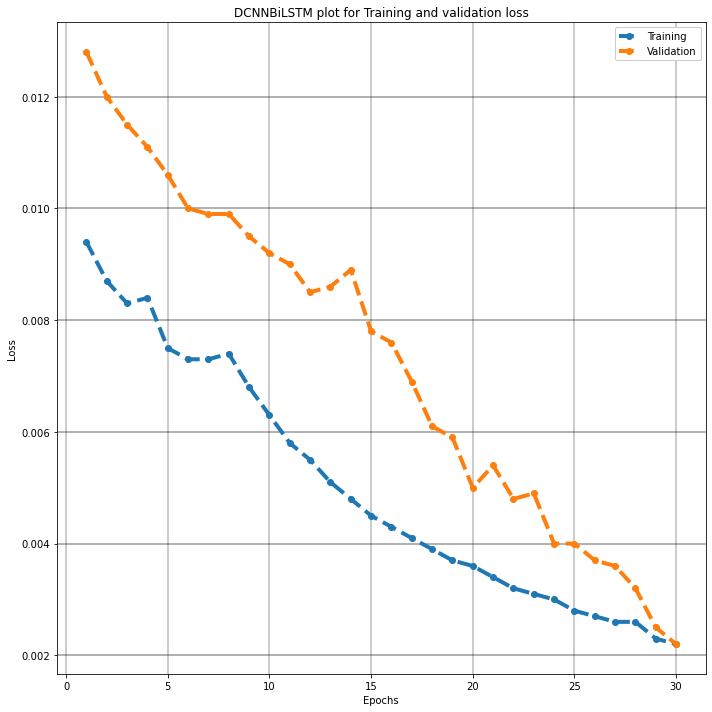

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_facecolor("white")

plt.plot(history.history['loss'], 'o--', linewidth=3)
plt.plot(history.history['val_loss'], 'o--', linewidth=3)

plt.grid(axis='x', alpha=.2, color='k', linestyle='-', linewidth=2)
plt.grid(axis='y', alpha=.2, color='k', linestyle='-', linewidth=2)

plt.title("DCNNBiLSTM Plot for train and validation loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right', facecolor='white', framealpha=0.7)
plt.show()

fig.savefig('CIC-DDoS2019_CNN_BiLSTM_DNN_loss.pdf')

plt.clf()

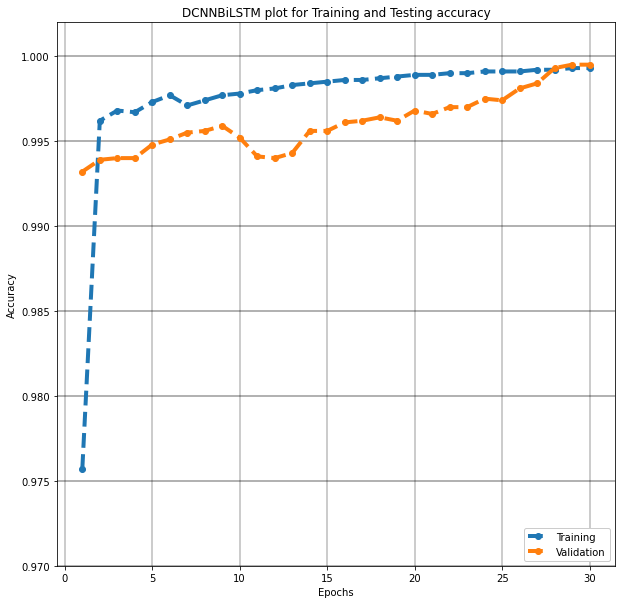

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_facecolor("white")

plt.plot(history.history['accuracy'], 'o--', linewidth=3)
plt.plot(history.history['val_accuracy'], 'o--', linewidth=3)

plt.grid(axis='y', alpha=.3, color='k', linestyle='-', linewidth=2)
plt.grid(axis='x', alpha=.2, color='k', linestyle='-', linewidth=2)
plt.ylim(0.90,1.002)

plt.title("DCNNBiLSTM Plot for train and Testing accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right', facecolor='white', framealpha=0.7)

plt.show()

fig.savefig('CIC-DDoS2019_CNN_BiLSTM_DNN_accuracy.pdf')
plt.clf()

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

68734/68734 [==============================] - 764s 11ms/step


In [ ]:
pred.shape
y_test.shape

(2199486,)

In [ ]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted')

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

68734/68734 [==============================] - 753s 11ms/step


C:\Users\Maruata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Completed
Time taken: 0:26:19.919993
Validation score: 0.9962482143555358
Evaluation score: [0.002246312503516674, 0.999548185634613]
Recall score: 0.9995482143555358
Precision score: 0.999598029349781
F1 Measure score: 0.9995697033749087
ROC-AUC score: 0.9468405446617637
